# pandas Exercises

Comments:
- Choose the exercise you find most interesting
- You do not have to solve them all
- The exercises are structured into independent blocks; hence you can leave some of them out
- Feel free to explore on your own as well
- If are stuck or are not sure how to proceed, raise your hand or approach your mentor

## Survey of Labour and Income Dynamics

**Description:** 
The [SLID](https://vincentarelbundock.github.io/Rdatasets/doc/car/SLID.html) data frame has 7425 rows and 5 columns. The data are from the 1994 wave of the Canadian Survey of Labour and Income Dynamics, for the province of Ontario. There are missing data, particularly for wages.

- [File](data/SLID.csv)

**Questions:**
- What are the data ranges?
- Are the categorical variables balanced?
- How many missing values do we have?
- How does the income depend on age or sex?
- How does the incomde depend on sex and the educational level?

We will do so by producing both tables and plots.

### Preparations

In [1]:
# hint: some imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [2]:
# load the data as shown in the intro part

In [3]:
path = 'data/SLID.csv'
df = pd.read_csv(path, index_col=0)
df.head()

wages  education  age   sex language
1  10.56       15.0   40  Male  English
2  11.00       13.2   19  Male  English
3    NaN       16.0   49  Male    Other
4  17.76       14.0   46  Male    Other
5    NaN        8.0   71  Male  English

### Explore Data

Question: Is our data set balanced? What are the extreme values?

- What is min/max in wage and education?
- How often do the different categorical values occur?

**Hints:**
- With regards to min/max, there are of course different approaches; you have already seen one.
- With regards to occurences, you may consider:
  - [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html)
  - [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter)
  - What does the corresponing method do?
- In case you encounter a problem in the case of 'language', any idea why? Are there NaN values?

In [4]:
# your code
# (continue with intro)

In [5]:
df.describe().loc[['min', 'max']]

wages  education   age
min   2.30        0.0  16.0
max  49.92       20.0  95.0

In [6]:
np.unique(df['sex'], return_counts=True)

(array(['Female', 'Male'], dtype=object), array([3880, 3545]))

In [7]:
np.unique(df['language'].dropna(), return_counts=True)

(array(['English', 'French', 'Other'], dtype=object),
 array([5716,  497, 1091]))

### Clean Data

Question: How can we get rid off missing values?

- Get rid off missing values:
  - Only keep rows with no missing values at all
  - Only drop rows with missing values in the 'wage' column

- Compare the shapes of the cleaned and the original data

**Hints:**
- Use auto-complete to search for an appropriate method starting with 'd'; i.e. df.d + TAB.

In [8]:
# your code

In [9]:
df.dropna().shape

(3987, 5)

In [10]:
df.dropna(subset=['wages']).shape

(4147, 5)

### Group/Aggregate Data

Question: Can you provide me with a brief summary about how wage and education depend on sex?

- Group by sex and compute mean values for both wage and education.
- In addition, compute median and std as well; perform these computations at once by passing several 
  aggregation functions.
- Exort your analysis to a csv file.

**Hints:**
- Take a look at the [`.agg()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) documentation or the more verbose [groupby, split, apply, combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
- Read operations are generally called `read_*` whereas write operations are prefixed `to_*`.

In [11]:
# your code
# (continue with intro)

In [12]:
df.groupby('sex').mean()[['wages', 'education']]

wages  education
sex                         
Female  13.889576  12.404857
Male    17.222213  12.596948

In [13]:
df.groupby('sex').agg(['mean', 'median', 'std'])[['wages', 'education']]

wages                   education                 
             mean median       std       mean median       std
sex                                                           
Female  13.889576  12.35  7.088553  12.404857   12.1  3.309194
Male    17.222213  16.09  8.279061  12.596948   12.0  3.418136

In [14]:
df.groupby('sex').mean()

wages  education        age
sex                                    
Female  13.889576  12.404857  44.597938
Male    17.222213  12.596948  43.309450

In [15]:
df_res = df.groupby('sex').mean()
#df_res.to_csv('exploration.csv')

### Visualize I

Question: How does depend wage on age?

- Revisit the scatterplot from the intro part and in addition plot
  - the mean (how does it compare to the median)
  - and the standard deviation (think about adding it to a separate axis due to resolve scaling issues)

In [16]:
# your code
# (continue with intro)

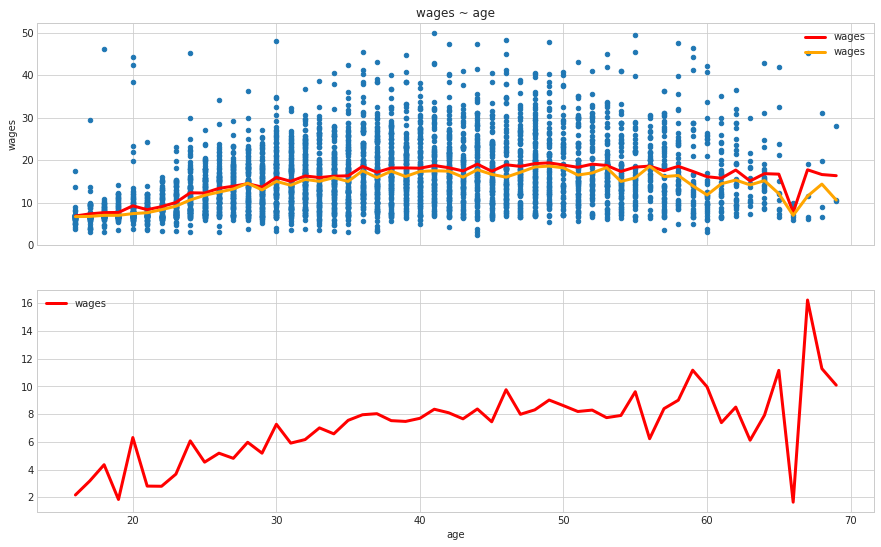

In [17]:
fig, axs = plt.subplots(figsize=(15, 9), nrows=2, sharex=True)
ax = axs[0]
df.plot.scatter(x='age', y='wages', ax=ax)
df.groupby('age').agg('mean').plot(y='wages', ax=ax, color='r', linewidth=3)
df.groupby('age').agg('median').plot(y='wages', ax=ax, color='orange', linewidth=3)
ax.set_title('wages ~ age')
ax = axs[1]
df.groupby('age').agg('std').plot(y='wages', ax=ax, color='r', linewidth=3)

### Visualize II

Question: Is there a differences between sexes when it comes to the income? Is there a difference between the sexes when it comes to education?

- Make a boxplot to compare the effect effects related to
  - How does wage depend on sex?
  - How does education depend on sex?

**Hints:**
- Use the excellent [seaborn](https://seaborn.pydata.org/) library, namely it's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

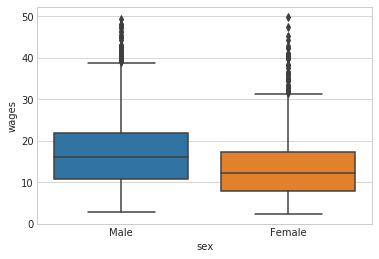

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='wages')

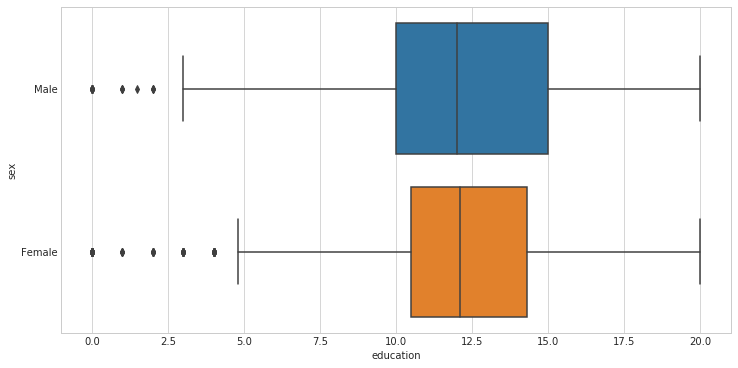

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='sex')

### Visualize III

Question: Do you earn more the more time you spend on education?

- Plot the relationship between education and wage.


**Hints:**
- Since both variables are continuous, a scatterplot is a good choice
- Using the below defined variable education_bins allows to make a boxplot as well; in this case use the `hue` 
  variable in `sns.boxplot`

In [20]:
# hint:
# let's add a categorical variable to bin education (in years)
df['education_bins'] = pd.cut(df['education'], bins=np.arange(0, 20, 4, dtype=np.int))
df.head()

wages  education  age   sex language education_bins
1  10.56       15.0   40  Male  English       (12, 16]
2  11.00       13.2   19  Male  English       (12, 16]
3    NaN       16.0   49  Male    Other       (12, 16]
4  17.76       14.0   46  Male    Other       (12, 16]
5    NaN        8.0   71  Male  English         (4, 8]

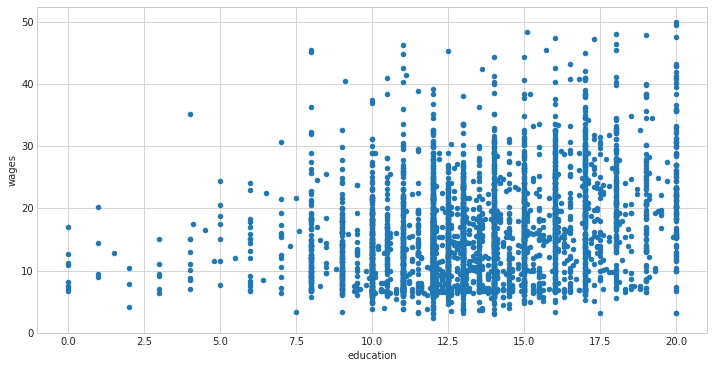

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
df.plot.scatter(x='education', y='wages', ax=ax)

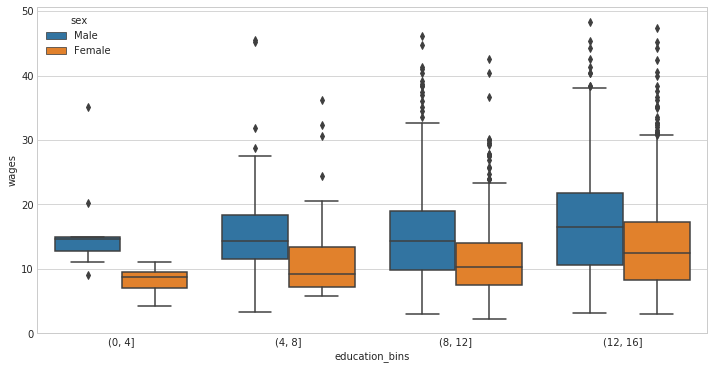

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='education_bins', y='wages', hue='sex')

### Whatever else you find interesting :)

What about language? Feel free to explore further.